In [1]:
import tensorflow as tf                                # TensorFlow es una biblioteca de código abierto para aprendizaje automático
import numpy as np                                     # NumPy es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales
import matplotlib.pyplot as plt                        # Matplotlib es una biblioteca para la generación de gráficos a partir de datos
%matplotlib inline
from sklearn.preprocessing import LabelEncoder         # sklearn labelEncoder codifica las etiquetas de destino con un valor entre 0 y n_classes-1.
from sklearn.preprocessing import OneHotEncoder        # sklearn OneHotEncoder codificación en one-hot

Se guarda el datset en la variable fmnist 

In [76]:
fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data( )
ejemplo = x_test[0]

Transformar la matriz de 28*28 a un vector de 784, incluye cambiar la forma de vector plano y dejar explicitamente el tipo de dato

In [77]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

Para codificar en One hot las etiquetas de los datos, las funciones de SKLearn
"sparse=False", el resultado que nos dará es un vector

In [4]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

Declar la arquitectura en keras

Sequential crea un contenedor al cual se podrán agregar diferentes elementos que definan el modelo a implementar

Dense para definir el contenido de la red, recibe 3 parametros (salida , entrada, función de activación) 

In [5]:
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(50, input_shape=(784,) , activation='relu'))
modelo.add(tf.keras.layers.Dense(50, activation = 'relu'))
modelo.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Metricas

En compile le decimos cómo se va a resolver la optimización de la red

In [6]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),          # optimizador Adam con learning rate 0.001
               loss=tf.keras.losses.categorical_crossentropy,      # calcular la perdida por entropia cruzada
               metrics=['accuracy'])                               # Metrica exactitud 

In [25]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento

In [7]:
historial = modelo.fit(x=x_train, y=y_train_onehot,batch_size =100, epochs=10, validation_data=(x_test,y_test_onehot))

Epoch 1/10
600/600 [==============================] - 5s 4ms/step - loss: 2.8879 - accuracy: 0.6802 - val_loss: 0.8295 - val_accuracy: 0.7456
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7138 - accuracy: 0.7712 - val_loss: 0.7513 - val_accuracy: 0.7672
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6019 - accuracy: 0.7985 - val_loss: 0.6764 - val_accuracy: 0.7751
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5498 - accuracy: 0.8142 - val_loss: 0.5490 - val_accuracy: 0.8182
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5217 - accuracy: 0.8226 - val_loss: 0.5191 - val_accuracy: 0.8270
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5107 - accuracy: 0.8250 - val_loss: 0.6135 - val_accuracy: 0.7935
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4840 - accuracy: 0.8322 - val_loss: 0.5336 - val_accuracy: 0.8227
Epoch 

#función de perdida

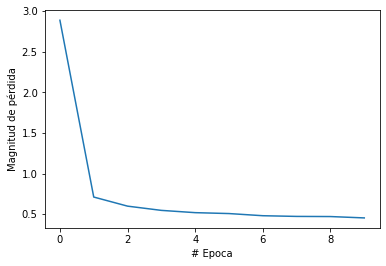

In [8]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
plt.show()

#Prueba del modelo

Se prueba el modelo con la función predict, con este ejemplo se tomo la primera imagen del dataset de prueba que es un bota con la etiqueta 9 

Se imprime la image 1 del dataset de prueba

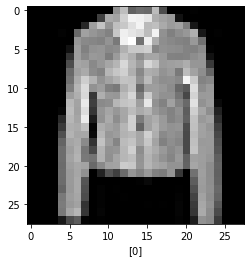

In [78]:
imagen = ejemplo
plt.imshow(imagen,cmap='gray')
plt.xlabel([y_train[0]])
plt.show()

In [79]:
x_test[[0]].shape

(1, 784)

Se utiliza el metodo predict para que el modelo nos prediga a que clase corresponde

In [80]:
modelo.predict(x_test[[0]])

array([[1.0113135e-03, 3.3593105e-04, 3.9066586e-01, 5.6407480e-03,
        5.5353725e-01, 3.9913192e-07, 4.7925465e-02, 2.1552924e-14,
        8.8301848e-04, 4.2329799e-11]], dtype=float32)

Se implementa la funcion srgmax para obtener el valor mas grande el modelo predice que es 9 "Ankle boot" la categoria a la que pertenece 

In [82]:
p = np.argmax(modelo.predict(x_test[[0]]))
p

4

Conclusión:

La implementación y el tiempo de entrenamiento es más rapido usando keras
La exactitud con este entrenamiento es de 85 % +- 2 en cada prueba.

Se realizo algunos cambios con resécto a la implementación solo con tensorflow como: Las funciones de activación, las epocas, el lote de entrenamiento.


En esta prueba por tiempo y exactitud keras es superior, anque limita en gran medida algunos parametros que se pueden modificar en tensorflow.


Trabajos Futuros:

Se recomineda usar Dropout layer para desactivar algunas neuronas al azar y compense el rendimiento en su conjunto

Para este tipo de problemas de imagenbes es recomendable usar redes convolucionales

Referencias:

Notas y código de la clases Redes Neuronales Avanzadas (B22)

https://www.tensorflow.org/

https://keras.io/

https://www.youtube.com/watch?v=iX_on3VxZzk